# Proyecto final PDS  Filtros FIIR - IIR
## Carolina Jiménez Restrepo
### 1020470694

### Librerias 

In [1]:
#Librerias necesarias para el desarrollo del notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from IPython.display import Audio 
from scipy.io.wavfile import read 
import scipy.signal as sp
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from matplotlib.pylab import *
import time
import scipy.io as sio
from scipy.signal import butter, lfilter
from biosppy.signals import ecg
%matplotlib inline

## 1.	Filtrado de música 

**1.1** Cargue el audio llamado “song.wav” y grafique la señal en frecuencia, recuerde normalizar.

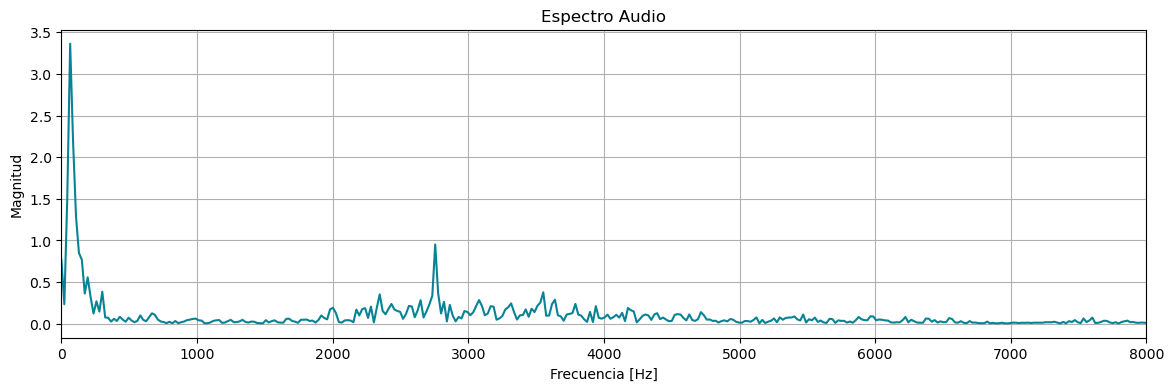

In [2]:
file_audio2 = ('song.wav') # Se selecciona el archivo a abrir.
fs2, Audio2 = read(file_audio2) # Se extrae la Fs y el contenido del audio.
Norm_Audio2 = Audio2/max(abs(Audio2)) # Se normaliza el audio.

N = 512*4
 
#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio2,H_audio2 = sp.freqz(Norm_Audio2,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize = (14,4))
plt.plot((W_audio2-np.pi)*fs2/(2*np.pi),np.abs(np.fft.fftshift(H_audio2))/max(np.fft.fftshift(H_audio2)),color = '#088395')
plt.axis(xmax=fs2/2,xmin=-fs2/2)
plt.title("Espectro Audio")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,8000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()


Audio(Norm_Audio2, rate=fs2)

**1.2** El audio esta compuesto por: Bajo, Guitarra y Voz, diseñe los filtros adecuados para obtener por separado el bajo, la guitarra y la voz. Grafique el filtro y el espectro para cada uno. 

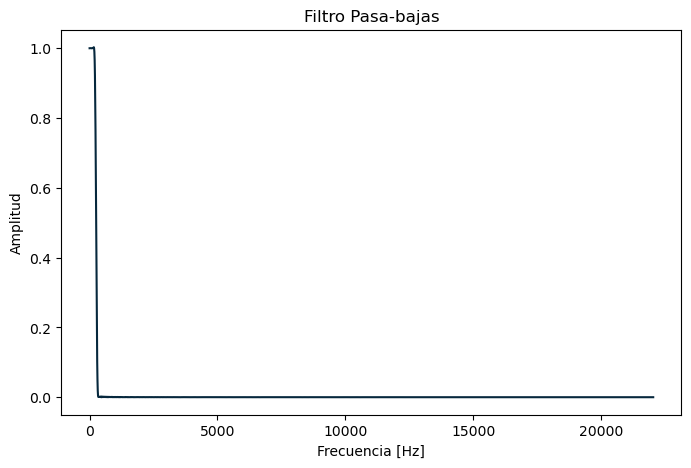

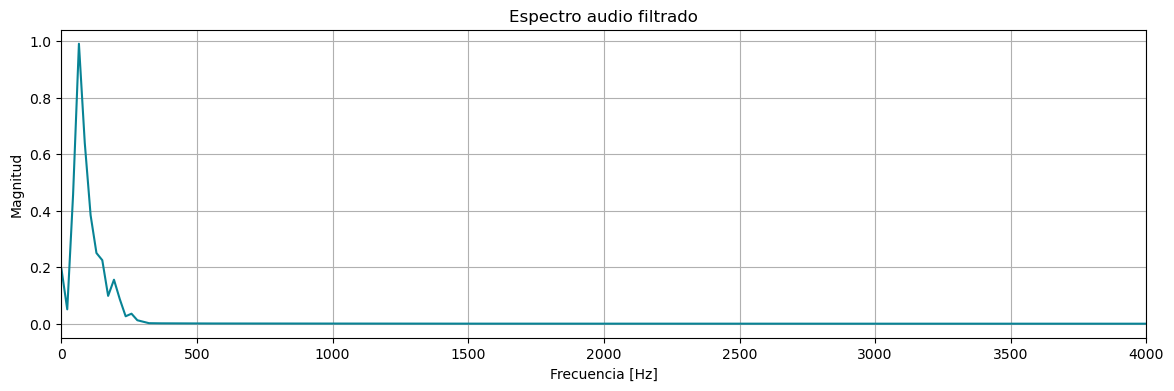

In [3]:
# Filtro para obtener el bajo, pasa-bajos
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs2 / 2.0
roll_off = 200.0
cutoff_hz = 256.0
width = roll_off/nyq_rate
ripple_db = 70.0 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero='lowpass')
w, h = freqz(taps, [1], worN=2000)

#Gráfica del filtro
plt.figure(figsize=(8, 5))
plt.plot(nyq_rate*w/np.pi, np.abs(h), color = '#06283D')
plt.title("Filtro Pasa-bajas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.show()

#Filtrado del audio
filtered_x1 = lfilter(taps, 1.0, Norm_Audio2)

N = 512*4
#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio2f,H_audio2f = sp.freqz(filtered_x1,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize = (14,4))
plt.plot((W_audio2f-np.pi)*fs2/(2*np.pi),np.abs(np.fft.fftshift(H_audio2f))/max(np.fft.fftshift(H_audio2f)),color = '#088395')
plt.axis(xmax=fs2/2,xmin=-fs2/2)
plt.title("Espectro audio filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,4000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()
Audio(filtered_x1, rate =fs2)

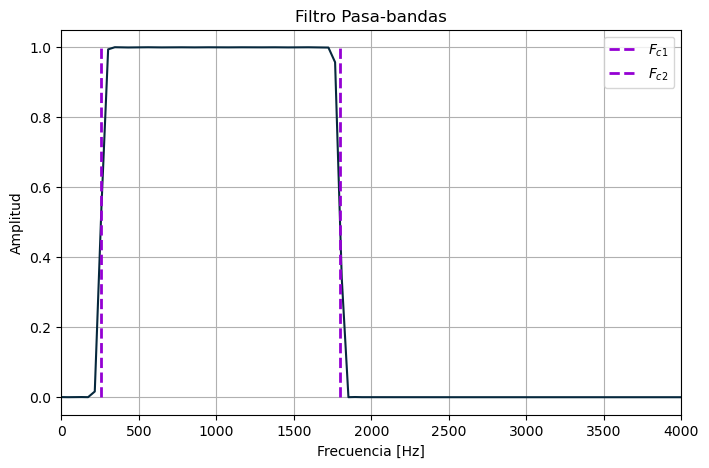

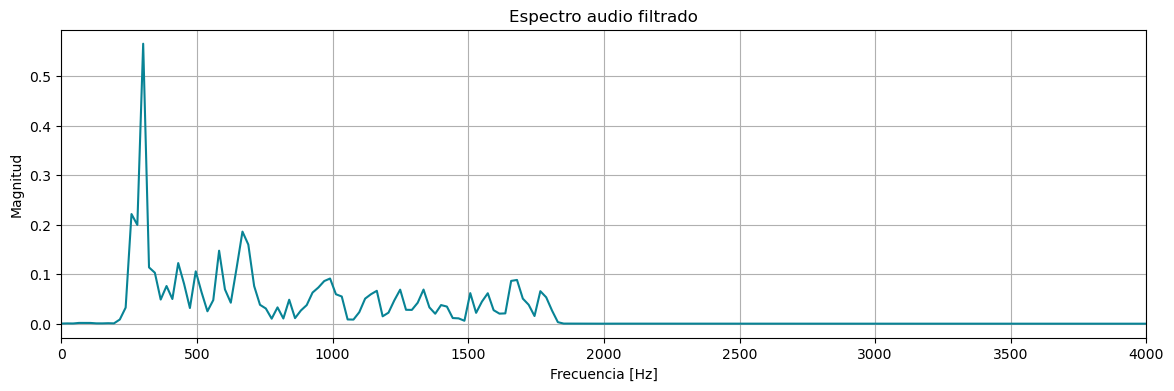

In [4]:
# Filtro para obtener la voz pasa-bandas
from scipy.signal import kaiserord, lfilter, firwin, freqz
# Definir las frecuencias de corte del filtro
nyq_rate = fs2/2.0
roll_off = 100.0
fc1 = 256
fc2 = 1800
width = roll_off/nyq_rate
ripple_db = 60 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N, [fc1/nyq_rate, fc2/nyq_rate], pass_zero='bandpass', width=width)
w, h = freqz(taps, [1], worN=512)

#Gráfica del filtro
plt.figure(figsize=(8, 5))
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#06283D')
plt.vlines(fc1, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c1}$')
plt.vlines(fc2, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c2}$')
plt.title("Filtro Pasa-bandas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.xlim([0,4000])
plt.legend()
plt.grid()

filtered_x2 = lfilter(taps, 1, Norm_Audio2)

N = 512*4

#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio3f,H_audio3f = sp.freqz(filtered_x2,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize = (14,4))
plt.plot((W_audio3f-np.pi)*fs2/(2*np.pi),np.abs(np.fft.fftshift(H_audio3f))/max(np.fft.fftshift(H_audio3f)),color = '#088395')
plt.axis(xmax=fs2/2,xmin=-fs2/2)
plt.title("Espectro audio filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,4000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()

Audio(filtered_x2, rate =fs2)


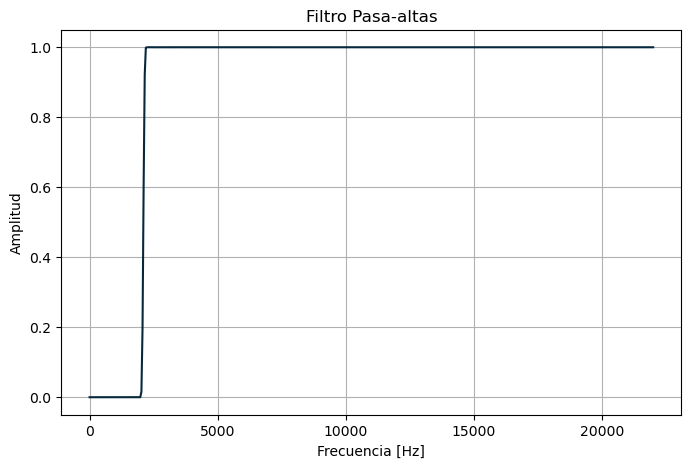

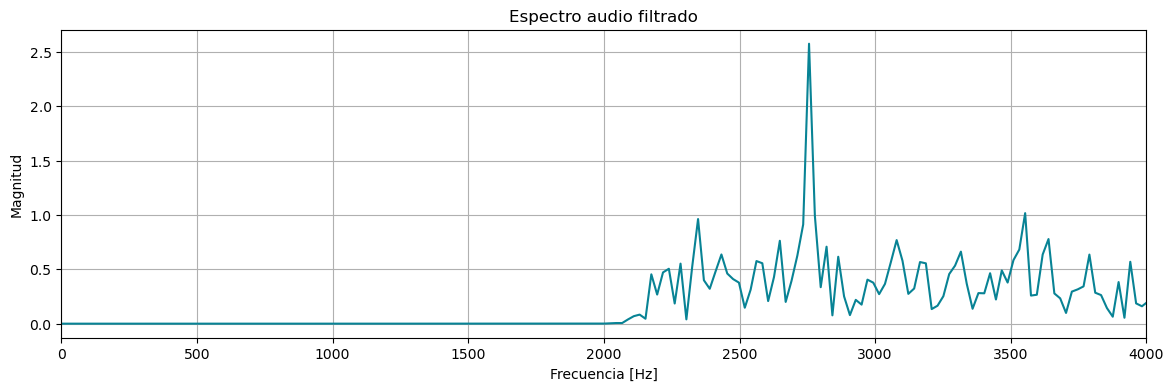

In [5]:
# Filtro para obtener la guitarra, pasa-altas
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs2/2.0
roll_off = 200.0
fc = 2100
width = roll_off/nyq_rate
ripple_db = 70 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N+1, fc/nyq_rate, pass_zero='highpass', width=width)
w, h = freqz(taps, [1], worN=512)

#Gráfica del filtro
plt.figure(figsize=(8,5))
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#06283D')
plt.title("Filtro Pasa-altas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

#Filtrado del audio
filtered_x3 = lfilter(taps, 1.0, Norm_Audio2)

N = 512*4
 
#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio4f,H_audio4f = sp.freqz(filtered_x3,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize=(14,4))
plt.plot((W_audio4f-np.pi)*fs2/(2*np.pi),np.abs(np.fft.fftshift(H_audio4f))/max(np.fft.fftshift(H_audio4f)),color = '#088395')
plt.axis(xmax=fs2/2,xmin=-fs2/2)
plt.title("Espectro audio filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,4000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()
Audio(filtered_x3, rate =fs2)

**1.3**	¿Se pueden obtener los instrumentos y la voz? ¿Hay algún cambio respecto al audio original?

Si se pueden obterner, el bajo no se logra escuchar muy bien pero se reconoce, esto puede ser porque tambien esta compuesto de frecuencias altas las cuales se filtran con el filtro pasa-bajos, la voz se logra reconocer pero toda con la guitarra de fondo, esto se debe a que la voz esta presente al mismo tiempo que la guitarra y esta se compone de frecuencias iguales a la de la voz, la guitarra se logra escuchar pero mas baja y con mala calidad, como un chirrido puede ser por la frecuencia alta que se utilizo para poder filtrar sin la voz.

El audio original se escucha con muy buena calidad y los elementos filtrados al ser separados no se escuchan con la misma calidad.

## 2.	Filtros FIR e IIR en una señal ECG

**2.1** Cargue el archivo llamado “ecg_simu”, grafique los datos del archivo con una fs de 1kHz

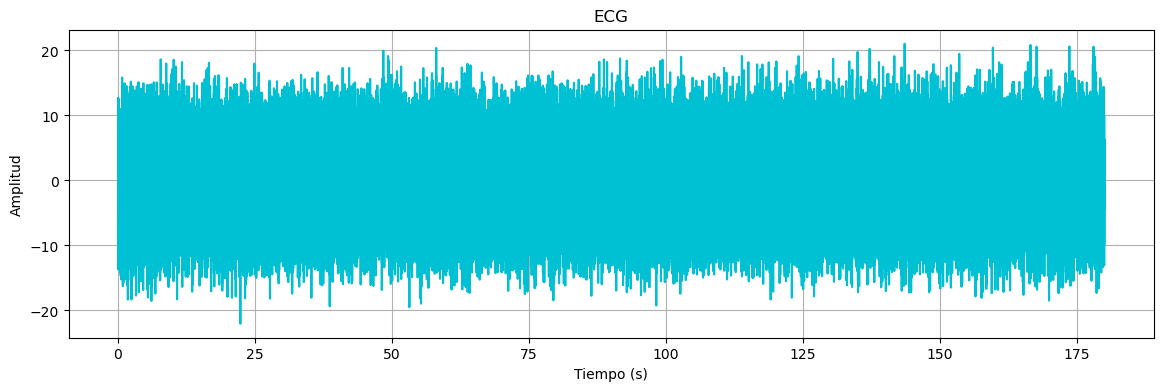

In [6]:
# Cargar los datos del archivo de texto
ecg = np.loadtxt('ecg_simu.txt')

# Generar el tiempo correspondiente a los datos
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, len(ecg)/fs, 1 /fs)

# Graficar los datos del ECG simulado
plt.figure(figsize=(14,4))
plt.plot(t, ecg, color = '#00C1D4')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG')
plt.grid()
plt.show()

**2.2** Diseñe un filtro IIR y un FIR pasa bandas con frecuencias entre 0 y 499. Grafiquelos

**Filtro FIR**

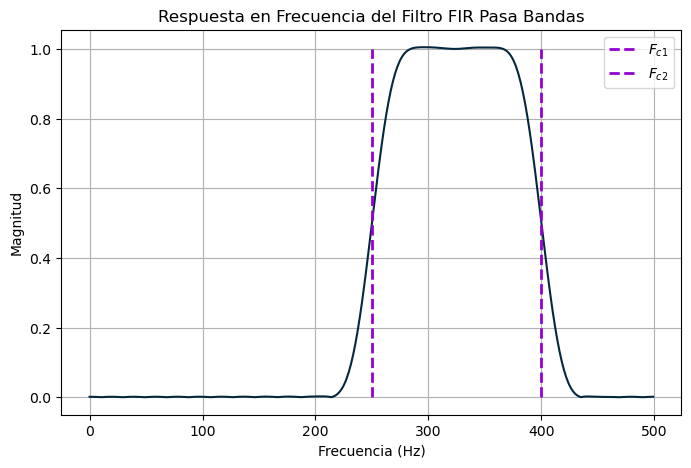

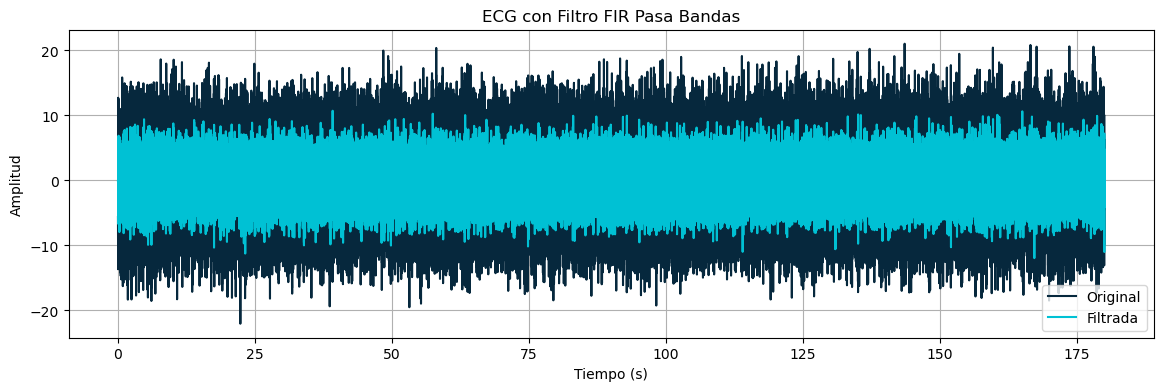

In [7]:
# FIR pasa - bandas
fc1 = 250  # Frecuencia de corte inferior en Hz
fc2 = 400 # Frecuencia de corte superior en Hz
order = 50  # Orden del filtro FIR

# Calcular los coeficientes del filtro FIR pasa bandas utilizando la función firwin
tapsfir = firwin(order + 1, [fc1, fc2], fs=fs, pass_zero=False)

# Aplicar el filtro FIR pasa bandas a la señal del ECG simulado
filtered_ecg = lfilter(tapsfir, 1.0, ecg)

# Calcular la respuesta en frecuencia del filtro FIR
w_band, h_band = freqz(tapsfir)

# Obtener la frecuencia en Hz
frequencies = w_band * fs / (2 * np.pi)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(8, 5))
plt.plot(frequencies, np.abs(h_band),color='#06283D')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bandas')
plt.vlines(fc1, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c1}$')
plt.vlines(fc2, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c2}$')
plt.legend()
plt.grid()
plt.show()

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(t, ecg, color='#06283D', label='Original')
plt.plot(t, filtered_ecg, color = '#00C1D4', label='Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG con Filtro FIR Pasa Bandas')
plt.legend()
plt.grid()
plt.show()

**Filtro IIR**

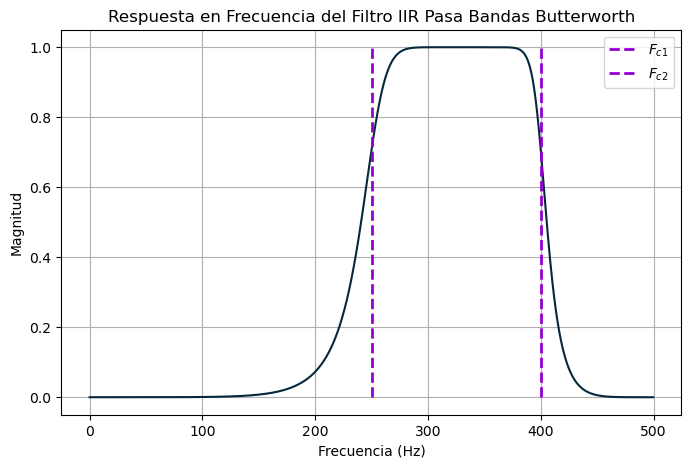

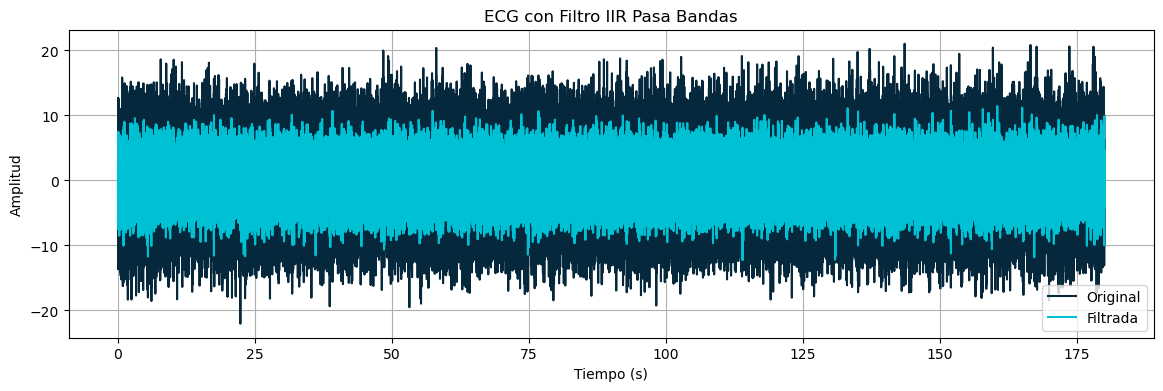

In [8]:
# Filtro IIR pasa - bandas
fc1 = 250  # Frecuencia de corte inferior en Hz
fc2 = 400 # Frecuencia de corte superior en Hz

# Calcular los coeficientes del filtro IIR pasa bandas utilizando la función butter
order_ir = 5  # Orden del filtro
b_ir, a_ir = butter(order_ir, [fc1, fc2], fs=fs, btype='band')

# Aplicar el filtro IIR pasa bandas a la señal del ECG simulado
filter_ecg = lfilter(b_ir, a_ir, ecg)

w_iir, h_iir = freqz(b_ir, a_ir, worN=2000, fs=fs)

# Graficar la respuesta en frecuencia del filtro
plt.figure(figsize=(8, 5))
plt.plot(w_iir, np.abs(h_iir), color='#06283D')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia del Filtro IIR Pasa Bandas Butterworth')
plt.vlines(fc1, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c1}$')
plt.vlines(fc2, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c2}$')
plt.legend()
plt.grid()
plt.show()

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(t, ecg, color='#06283D', label='Original')
plt.plot(t, filter_ecg, color = '#00C1D4', label='Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG con Filtro IIR Pasa Bandas')
plt.legend()
plt.grid()
plt.show()

**2.4**	Grafique el diagrama de polos y ceros para el filtro IIR. 

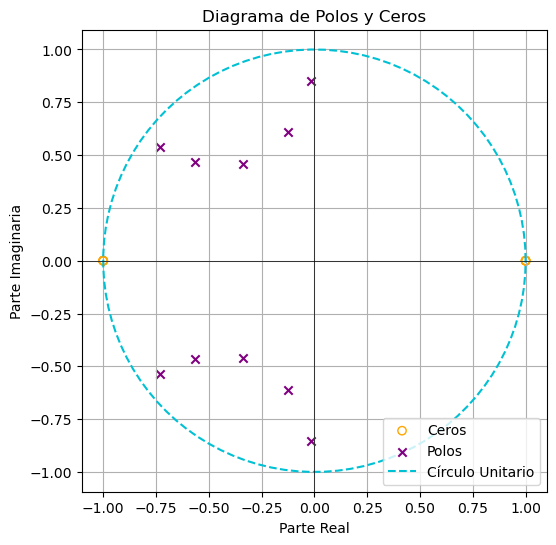

In [9]:
# Obtener los polos y ceros del filtro
w, h = freqz(b_ir, a_ir, worN=2000, fs=fs)
z = np.roots(b_ir)  # Ceros del filtro
p = np.roots(a_ir)  # Polos del filtro

# Graficar el diagrama de polos y ceros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='orange', label='Ceros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='purple', label='Polos')

# Dibujar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), '--', color = '#00C1D4', label='Círculo Unitario')

plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Polos y Ceros')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

**¿El filtro es estable?, ¿Por qué es mejor tener un filtro estable?**

Si es estable, ya que todos los polos se encuentran dentro del círculo unitario, es mejor tener un filtro estable para poder obtener la respuesta que se espera del filtro, como rechazar o dejar pasar frecuencia y la atenuación

**2.4** Aplique una ventana de Hamming al filtro FIR y grafique

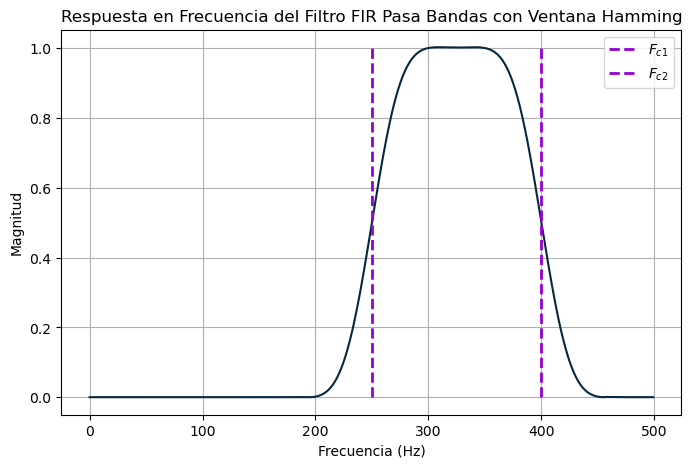

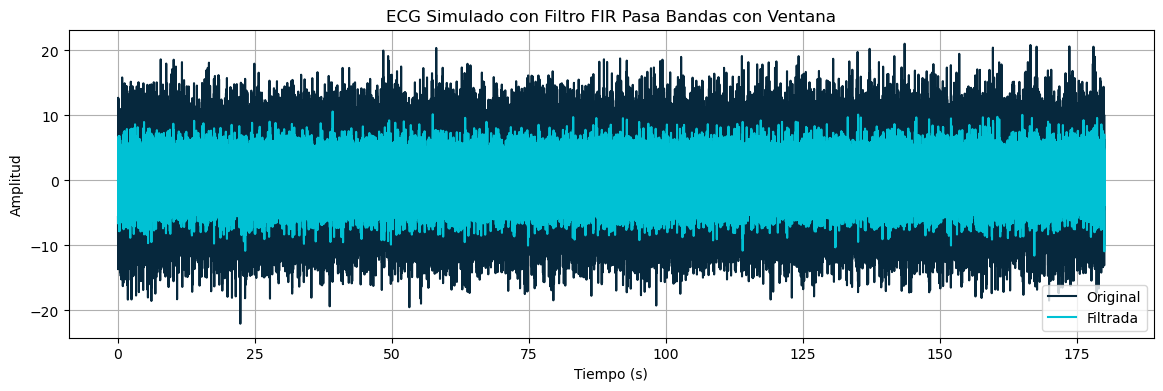

In [10]:
# Filtro FIR con ventana Hamming

from scipy.signal import firwin, lfilter, windows
tapsham = firwin(order + 1, [fc1, fc2], fs=fs, pass_zero=False)

# Aplicar una ventana de Hamming a los coeficientes del filtro
window_fir = windows.hamming(order + 1)
taps_windowed = tapsfir * window_fir

# Aplicar el filtro FIR pasa bandas con ventana a la señal del ECG simulado
filtered_ham = lfilter(taps_windowed, 1.0, ecg)
# Calcular la respuesta en frecuencia del filtro FIR con ventana
w_ham, h_ham = freqz(taps_windowed)

# Obtener la frecuencia en Hz
frequencies = w_ham * fs / (2 * np.pi)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(8,5))
plt.plot(frequencies, np.abs(h_ham), color='#06283D')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bandas con Ventana Hamming')
plt.vlines(fc1, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c1}$')
plt.vlines(fc2, 0, 1, color='darkviolet', lw=2, linestyle='--', label='$F_{c2}$')
plt.legend()
plt.grid()
plt.show()


# Graficar la señal original y la señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(t, ecg, color='#06283D', label='Original')
plt.plot(t, filtered_ham, color = '#00C1D4', label='Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Simulado con Filtro FIR Pasa Bandas con Ventana')
plt.legend()
plt.grid()
plt.show()

**2.5** Compare la respuesta en frecuencia del filtro FIR basa-bandas con y sin ventana

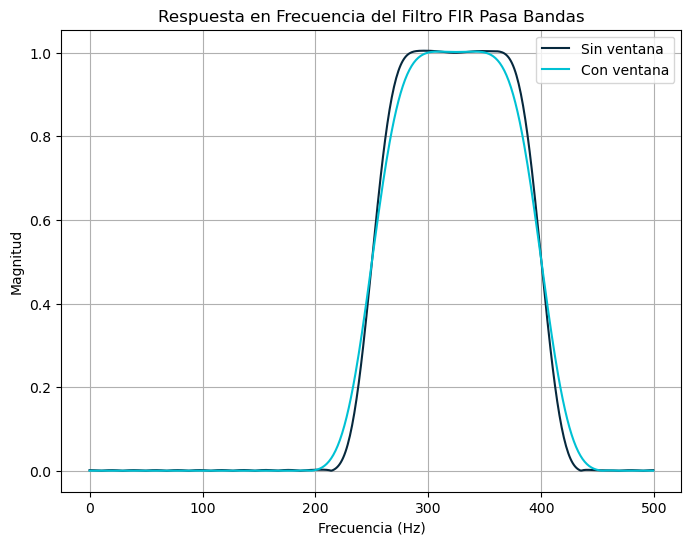

In [11]:
# Para el filtro FIR
#Sin ventana
w_band, h_band = freqz(tapsfir)
# Obtener la frecuencia en Hz
frequencies = w_band * fs / (2 * np.pi)

#con ventana
w_ham, h_ham = freqz(taps_windowed)
# Obtener la frecuencia en Hz
frequencies = w_ham * fs / (2 * np.pi)


# Graficar la respuesta en frecuencia
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(h_band), color='#06283D', label='Sin ventana')
plt.plot(frequencies, np.abs(h_ham),  color = '#00C1D4', label='Con ventana')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bandas')
plt.legend()
plt.grid()
plt.show()

**¿Hay alguna diferencia?**

Si hay diferencia, el filtro con ventana es más estrecho, esto se debe a que al aplicar la ventana se reduce la amplitud de los coeficientes en los extremos del filtro lo que lleva tambien a tener unos bordes más suavizados o redondeados si se comparan con los bordes del filtro sin ventana.

**2.6**	Establezca el límite [147.65,147.71] en el eje x, aplique los dos filtros y grafique en una sola figura.

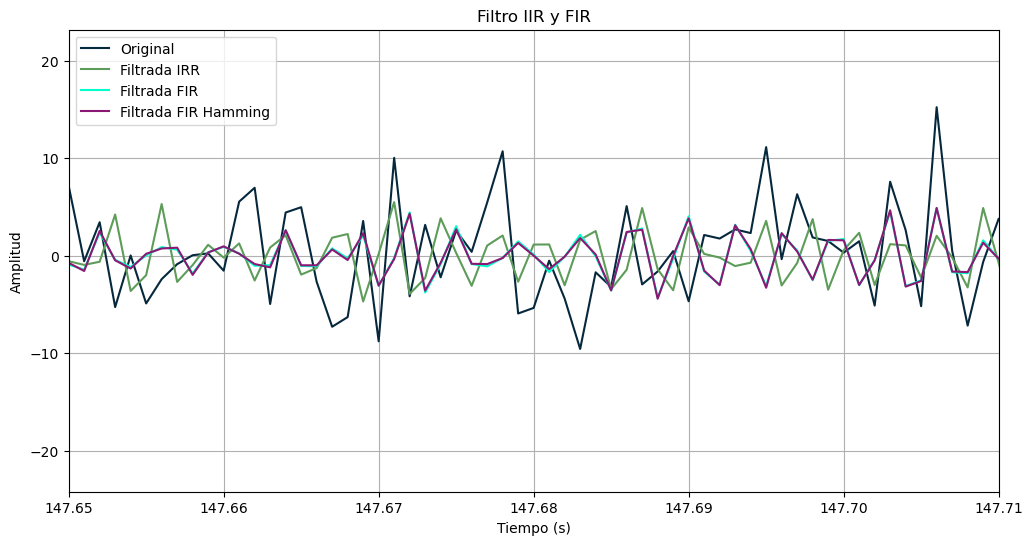

In [12]:
# Graficar la señal original y la señal filtrada
plt.figure(figsize=(12,6))
plt.plot(t, ecg, color='#06283D', label='Original')
plt.plot(t, filter_ecg, color = '#5D9C59', label='Filtrada IRR')
plt.plot(t, filtered_ecg, color = '#00FFCA', label='Filtrada FIR')
plt.plot(t, filtered_ham, color = '#8B1874', label='Filtrada FIR Hamming')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Filtro IIR y FIR')
plt.xlim([147.65,147.71])
plt.legend()
plt.grid(True)
plt.show()

**¿Qué observa?** 

Se observa que el filtro IIR esta desplazado y logra atenuar las frecuencias, el FIR sin ventana se ve igual al de ventana excepto en algunas partes donde se nota que el de ventana atenua más, también se observa que este atenua mejor que el IIR ya que la amplitud de los picos es menor.

## Conclusiones

**o** Al momento de realizar un filtrado para extraer instrumentos o voces de un audio hay perdida de información ya que al limitar los filtros a una frecuencia de corte se eliminan componentes específicos del espectro y esto afecta la calidad del audio extraído, para realizar este filtrado sin perder mucha información se requieren cálculos muy precisos y un procesamiento computacional muy alto.

**o** Es importante tener en cuenta el teorema de muestreo al momento de elegir las frecuencias de corte para los filtros basa-banda ya que debe cumplirse el rango de 0 a fs/2. Si esto no se cumple se produce aliasing, hay perdida de información y la señal no se puede representar correctamente

**o** El desplazamiento del filtro IIR puede ser debido a que poseen un retardo que se produce porque los coeficientes del filtro se aplican a muestras anteriores y actuales de la señal para obtener la salida filtrada, también porque los filtros IIR no tienen fase lineal y esto puede causar cambios en la fase de la señal


**o** En el filtro con ventana la banda de transición es más amplia que en el filtro sin ventana, pero se logra atenuar mejor fuera de la banda de paso lo que lo hace muy útil en casos donde hay señales con transiciones de mucho ruido.  

**o** El filtrado de señales de ECG requiere utilizar frecuencias especificas para filtrar ruido eléctrico, ruido producido por movimiento y por artefactos, también utiliza filtros específicos como filtro notch el cual elimina la interferencia de red eléctrica (50 Hz o 60Hz) y otro tipo de filtros según las características que se requieran encontrar. En esta guía solo se utiliza la señal ECG como forma de ver una señal diferente y experimentar con filtros.

**o** Para los filtros IIR no es necesario un order muy alto en comparación a los FIR que para tener un buen comportamiento en la respuesta se debe usar un orden alto

